In [8]:
# Stealing code from Chris
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')


from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
import numpy as np
import pandas as pd
%matplotlib inline

In [9]:
# Assign  shapefile to variable
pud_results = gpd.read_file('../data/pud_results_rainier.shp')
pud_results.head()

# Not sure I need these next two lines...

#ranier = gpd.read_file("data/rainierNP_boundary.shp")
#pud_results.head()

pud_results_nonzero = pud_results[(pud_results.T != 0).any()]

In [10]:
#pud_results.shape
pud_results_nonzero.shape

(322, 15)

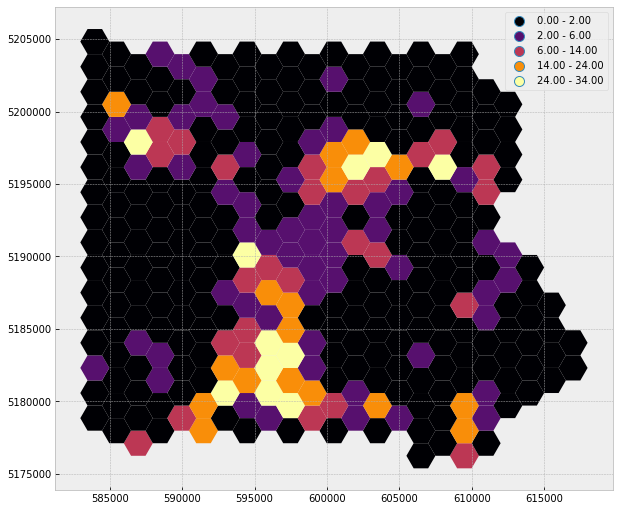

In [11]:
#Let's make a map
pud_results.plot(cmap = 'inferno',categorical = True, column = "PUD_AUG" ,figsize=(10, 10), legend = True, scheme = 'Fisher_Jenks') 


In [12]:
# Now lets make a list of column names for the months

column_list = list(pud_results.columns)
print(column_list)

['FID', 'PUD_YR_AVG', 'PUD_JAN', 'PUD_FEB', 'PUD_MAR', 'PUD_APR', 'PUD_MAY', 'PUD_JUN', 'PUD_JUL', 'PUD_AUG', 'PUD_SEP', 'PUD_OCT', 'PUD_NOV', 'PUD_DEC', 'geometry']


In [13]:
# Git rid of column names I don't want - probabaly a more elegant way to do this. 

index = [0, 1, 14,]

month_list = np.delete(column_list, index)

print(month_list)

['PUD_JAN' 'PUD_FEB' 'PUD_MAR' 'PUD_APR' 'PUD_MAY' 'PUD_JUN' 'PUD_JUL'
 'PUD_AUG' 'PUD_SEP' 'PUD_OCT' 'PUD_NOV' 'PUD_DEC']


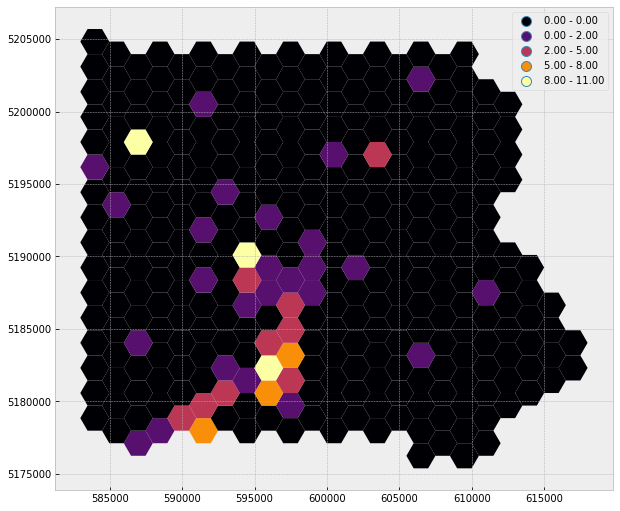

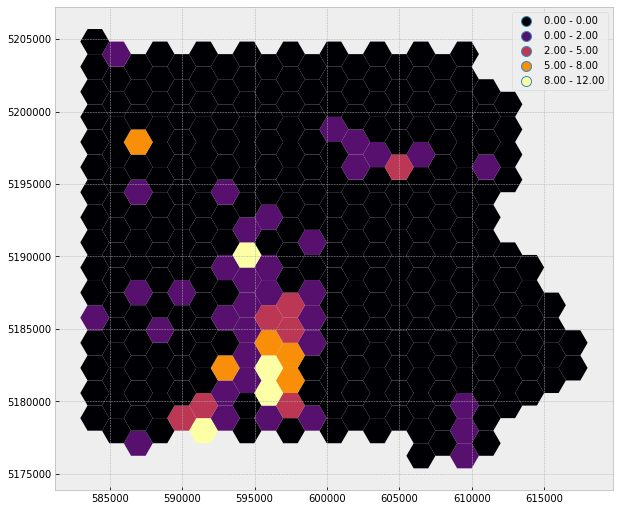

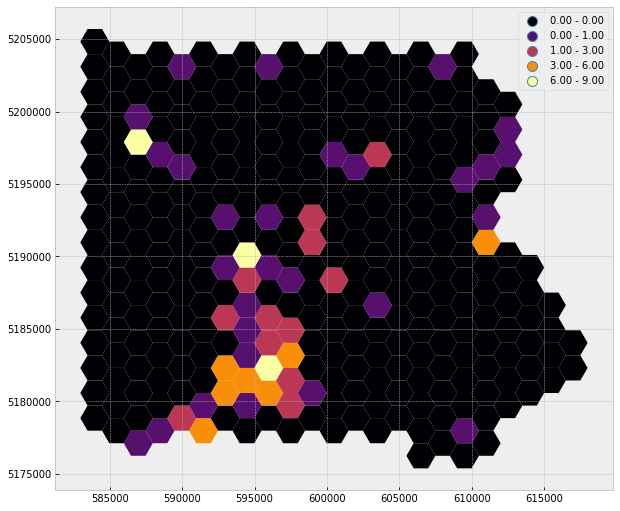

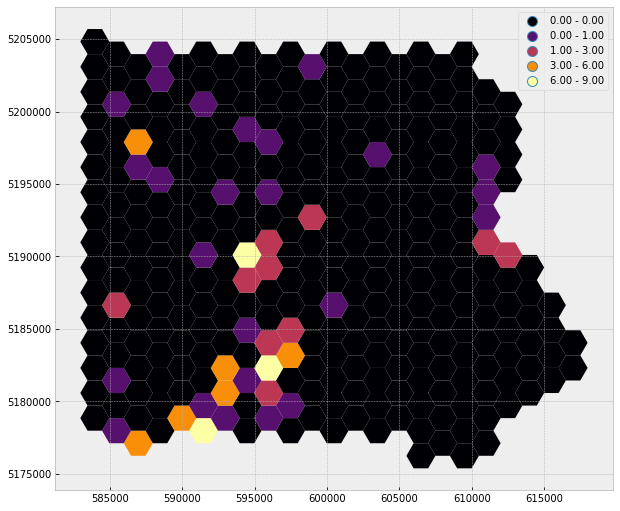

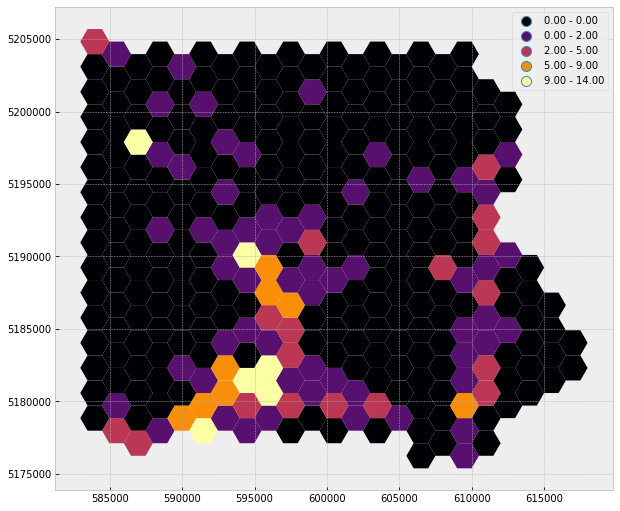

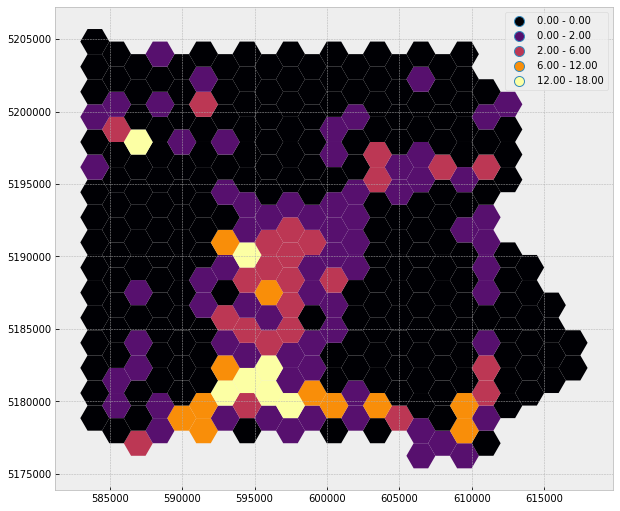

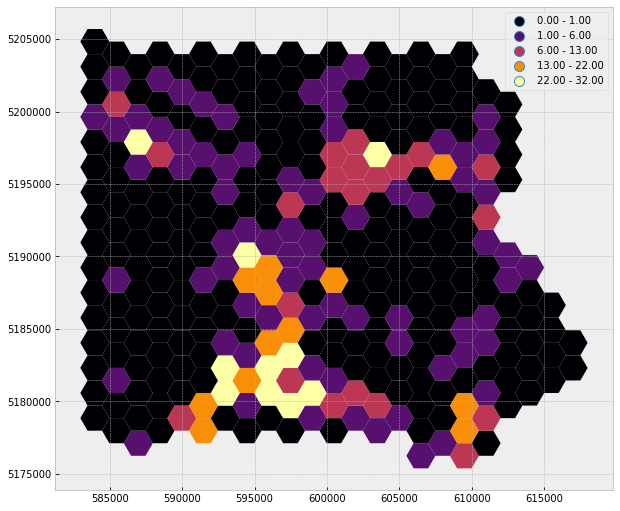

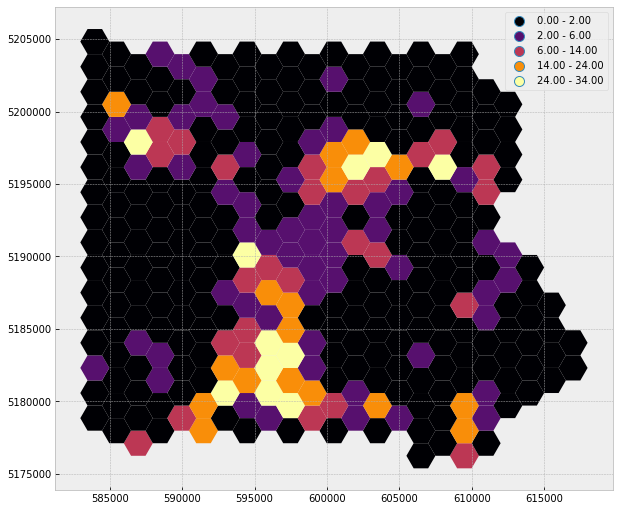

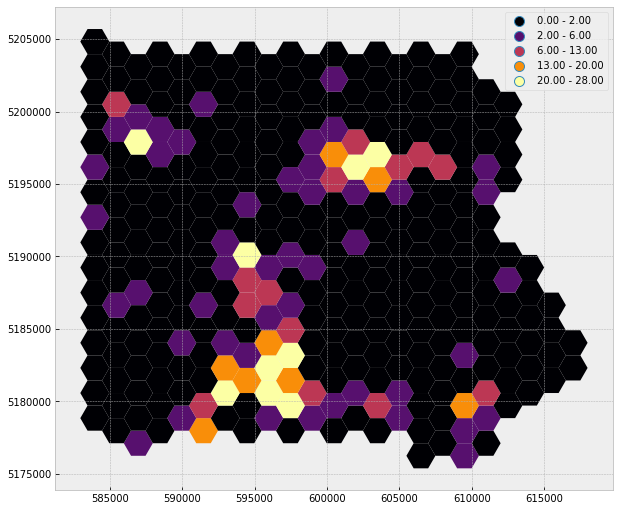

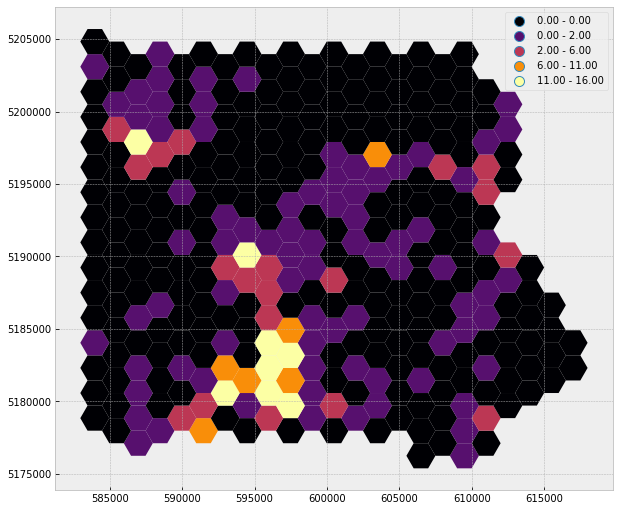

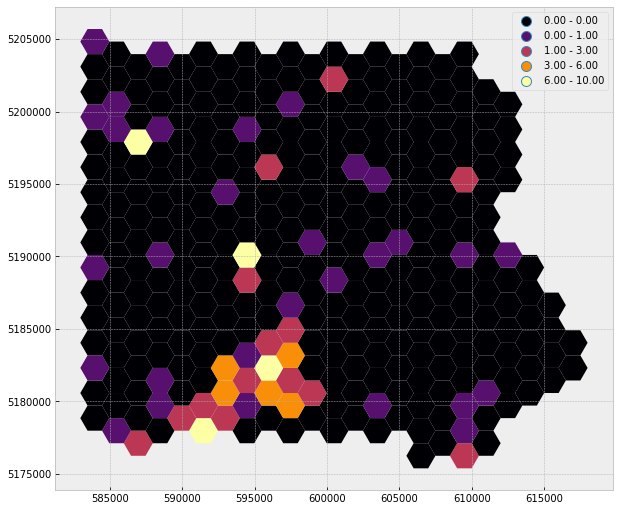

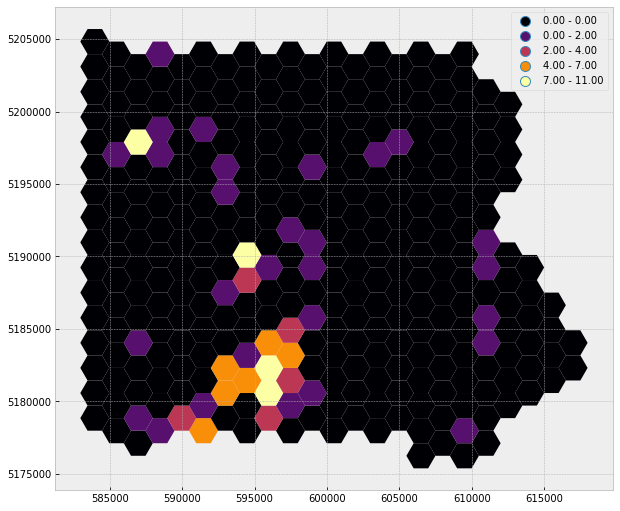

In [14]:
#Create a series of plots, based on month_list column names

for month in month_list:
    
    pud_results.plot(cmap = 'inferno',categorical = True, column = month ,figsize=(10, 10), legend = True, scheme = 'Fisher_Jenks') 


In [15]:
# Try an animation loop (from Randy's tutorial)

import animation_tools

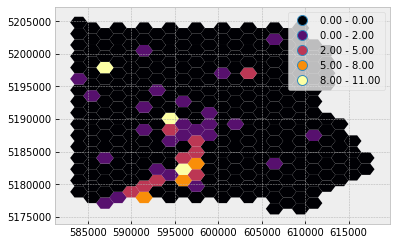

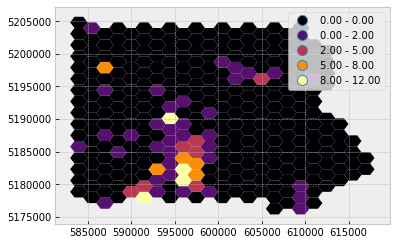

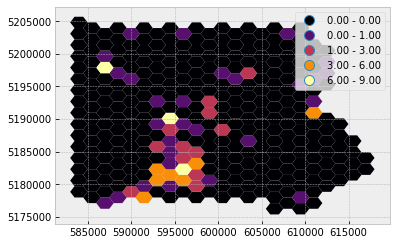

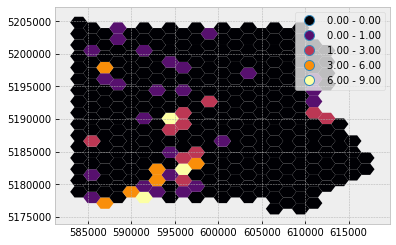

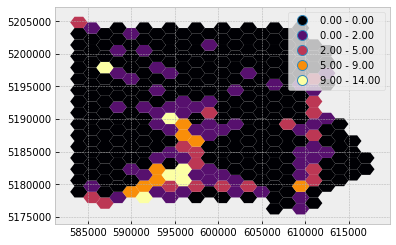

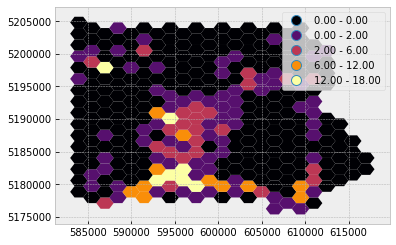

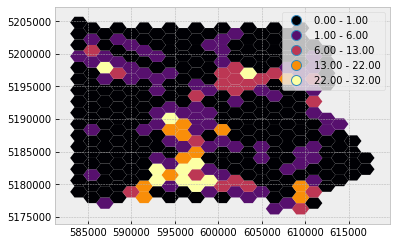

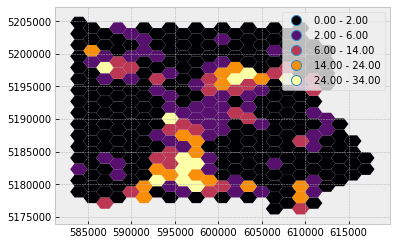

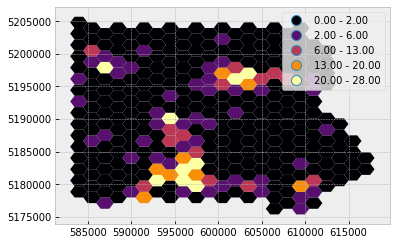

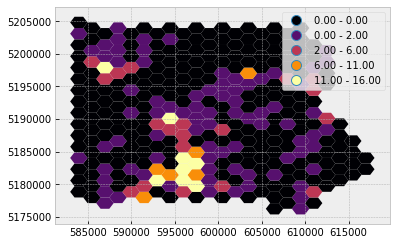

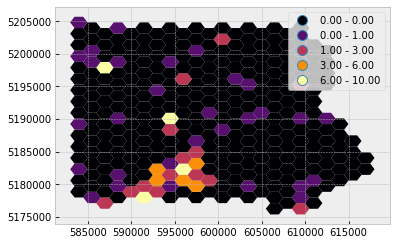

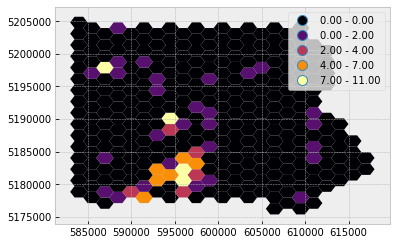

In [16]:
# Collect set of figures we will animate

figs = []  

for month in month_list:
    fig = plt.figure()
    axes = plt.axes()
    
    pud_results.plot(cmap = 'inferno',categorical = True, column = month ,figsize=(10, 10), legend = True, scheme = 'Fisher_Jenks', ax=axes) 

    figs.append(fig)
    #plt.close(fig)



In [17]:
# Animate?

animation_tools.interact_animate_figs(figs)

A Jupyter Widget

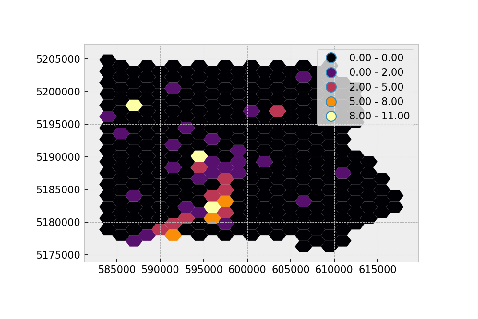

In [18]:
# Let's try the JS animation

images = animation_tools.make_images(figs, dpi=150)

animation_tools.JSAnimate_images(images, figsize=(8,4))

ImportError: *** JSAnimation package not found

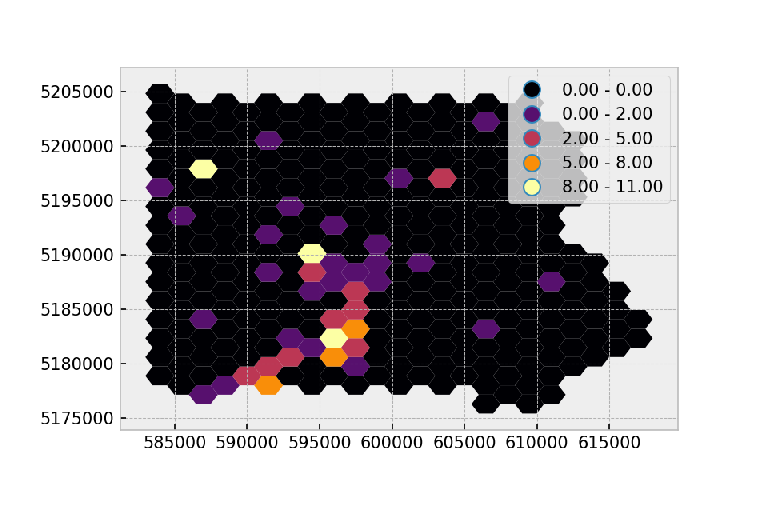

In [19]:
# Export animation to html

anim = animation_tools.JSAnimate_images(images, figsize=(10,8))

file_name = 'PUD_by_month.html'
animation_tools.make_html(anim, file_name=file_name, title="PUD", raw_html="Illustration of photo use days in Mount Rainier NP by month")